# Geo-locations_WeatherPy
A companion code to plot the coordinates of the cities.
Use this code to map the cities after running the WeatherPy code. 

In [15]:
# Dependencies
import pandas as pd
import os
import json
import requests
from config import gkey
from pprint import pprint
import matplotlib.pyplot as plt
import datetime as dt # to put a datestamp on the outputs
import gmaps

## Import the cities list

In [2]:
file = input("What is the name of the csv file for analysis?\n ")

What is the name of the csv file for analysis?
 city_list_20181014.csv


In [4]:
# Use the city list csv generated by WeatherPy.
cities_df = pd.read_csv(file)
cities_df["latitude"] = "" # make the latitude blank to get city latitude via Google Maps API
cities_df["longitude"] = "" # make the longitude blank to get city longitude via Good Maps API
cities_df = cities_df.drop(["Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"], axis = 1)
cities_df.head()

,city,country,latitude,longitude,city ID
0,tuatapere,nz,,,2180815
1,rikitea,pf,,,4030556
2,atuona,pf,,,4020109
3,soure,br,,,3387204
4,hobart,au,,,2163355


In [5]:
# Continents for the cities
filepath = os.path.join("Resources","country_codes.json")
with open(filepath) as json_file:
    json_data = json.load(json_file)

continents = pd.DataFrame(json_data)
continents1 = continents.stack()
continents1 = continents1.reset_index()
continents1
continents1 = continents1.rename(columns = {"level_0": "country",
                               "level_1": "continent"})

continents1.keys()

Index(['country', 'continent', 0], dtype='object')

In [6]:
# Merge the two dataframes
cities_df2 = pd.merge(cities_df, continents1, on = "country")
cities_df2.head()

,city,country,latitude,longitude,city ID,continent,0
0,tuatapere,nz,,,2180815,oceania,new zealand
1,bluff,nz,,,2206939,oceania,new zealand
2,waitati,nz,,,2179825,oceania,new zealand
3,kaeo,nz,,,2189343,oceania,new zealand
4,westport,nz,,,2206900,oceania,new zealand


## Finding the geo-locations of the cities in the list

In [7]:
# Create a parameters dictionary to contain the variables that will be updated through the search
params = {
    "key": gkey
}

# Create the iterations through the list of cities 
for index, row in cities_df2.iterrows():
    city = row["city"]
    country = row[0]
    
    # base url
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    # add location in params based on the cities in the dataframe
    params["address"] = f'{city},{country}'
    
    # create request and JSON-ify
    print(f"Retrieving the location of City {index}: {city},{country}")
    cities_coords_json = requests.get(base_url, params = params).json()
    
    # add the latitude and longitude of each city into the list
    try:
        print(f"{city} is on the map! Recording coordinates now.")
        cities_df2.loc[index, "latitude"] = cities_coords_json["results"][0]["geometry"]["location"]["lat"]
        cities_df2.loc[index, "longitude"] = cities_coords_json["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        print(f"{city} has not yet been discovered. Moving on...")
    
    print("----------")    

Retrieving the location of City 0: tuatapere,new zealand
tuatapere is on the map! Recording coordinates now.
----------
Retrieving the location of City 1: bluff,new zealand
bluff is on the map! Recording coordinates now.
----------
Retrieving the location of City 2: waitati,new zealand
waitati is on the map! Recording coordinates now.
----------
Retrieving the location of City 3: kaeo,new zealand
kaeo is on the map! Recording coordinates now.
----------
Retrieving the location of City 4: westport,new zealand
westport is on the map! Recording coordinates now.
----------
Retrieving the location of City 5: christchurch,new zealand
christchurch is on the map! Recording coordinates now.
----------
Retrieving the location of City 6: waipawa,new zealand
waipawa is on the map! Recording coordinates now.
----------
Retrieving the location of City 7: te anau,new zealand
te anau is on the map! Recording coordinates now.
----------
Retrieving the location of City 8: ahipara,new zealand
ahipara is 

palmerston is on the map! Recording coordinates now.
----------
Retrieving the location of City 71: launceston,australia
launceston is on the map! Recording coordinates now.
----------
Retrieving the location of City 72: stawell,australia
stawell is on the map! Recording coordinates now.
----------
Retrieving the location of City 73: broome,australia
broome is on the map! Recording coordinates now.
----------
Retrieving the location of City 74: port hedland,australia
port hedland is on the map! Recording coordinates now.
----------
Retrieving the location of City 75: kununurra,australia
kununurra is on the map! Recording coordinates now.
----------
Retrieving the location of City 76: karratha,australia
karratha is on the map! Recording coordinates now.
----------
Retrieving the location of City 77: biloela,australia
biloela is on the map! Recording coordinates now.
----------
Retrieving the location of City 78: mount isa,australia
mount isa is on the map! Recording coordinates now.
---

bitung is on the map! Recording coordinates now.
----------
Retrieving the location of City 141: meulaboh,indonesia
meulaboh is on the map! Recording coordinates now.
----------
Retrieving the location of City 142: labuhan,indonesia
labuhan is on the map! Recording coordinates now.
----------
Retrieving the location of City 143: sungaipenuh,indonesia
sungaipenuh is on the map! Recording coordinates now.
----------
Retrieving the location of City 144: bambanglipuro,indonesia
bambanglipuro is on the map! Recording coordinates now.
----------
Retrieving the location of City 145: kroya,indonesia
kroya is on the map! Recording coordinates now.
----------
Retrieving the location of City 146: tarakan,indonesia
tarakan is on the map! Recording coordinates now.
----------
Retrieving the location of City 147: padang,indonesia
padang is on the map! Recording coordinates now.
----------
Retrieving the location of City 148: mlonggo,indonesia
mlonggo is on the map! Recording coordinates now.
-------

palatka is on the map! Recording coordinates now.
----------
Retrieving the location of City 212: neryungri,russia
neryungri is on the map! Recording coordinates now.
----------
Retrieving the location of City 213: belyy yar,russia
belyy yar is on the map! Recording coordinates now.
----------
Retrieving the location of City 214: znamenskoye,russia
znamenskoye is on the map! Recording coordinates now.
----------
Retrieving the location of City 215: svetlaya,russia
svetlaya is on the map! Recording coordinates now.
----------
Retrieving the location of City 216: kungurtug,russia
kungurtug is on the map! Recording coordinates now.
----------
Retrieving the location of City 217: srednekolymsk,russia
srednekolymsk is on the map! Recording coordinates now.
----------
Retrieving the location of City 218: amga,russia
amga is on the map! Recording coordinates now.
----------
Retrieving the location of City 219: tulun,russia
tulun is on the map! Recording coordinates now.
----------
Retrieving 

rockport is on the map! Recording coordinates now.
----------
Retrieving the location of City 282: athens,united states
athens is on the map! Recording coordinates now.
----------
Retrieving the location of City 283: price,united states
price is on the map! Recording coordinates now.
----------
Retrieving the location of City 284: jesup,united states
jesup is on the map! Recording coordinates now.
----------
Retrieving the location of City 285: jackson,united states
jackson is on the map! Recording coordinates now.
----------
Retrieving the location of City 286: manassas,united states
manassas is on the map! Recording coordinates now.
----------
Retrieving the location of City 287: trinidad,united states
trinidad is on the map! Recording coordinates now.
----------
Retrieving the location of City 288: del rio,united states
del rio is on the map! Recording coordinates now.
----------
Retrieving the location of City 289: fountain,united states
fountain is on the map! Recording coordinate

skjervoy is on the map! Recording coordinates now.
----------
Retrieving the location of City 350: vardo,norway
vardo is on the map! Recording coordinates now.
----------
Retrieving the location of City 351: vigrestad,norway
vigrestad is on the map! Recording coordinates now.
----------
Retrieving the location of City 352: storebo,norway
storebo is on the map! Recording coordinates now.
----------
Retrieving the location of City 353: sorland,norway
sorland is on the map! Recording coordinates now.
----------
Retrieving the location of City 354: andenes,norway
andenes is on the map! Recording coordinates now.
----------
Retrieving the location of City 355: mehamn,norway
mehamn is on the map! Recording coordinates now.
----------
Retrieving the location of City 356: batsfjord,norway
batsfjord is on the map! Recording coordinates now.
----------
Retrieving the location of City 357: straumen,norway
straumen is on the map! Recording coordinates now.
----------
Retrieving the location of Cit

el sauzal is on the map! Recording coordinates now.
----------
Retrieving the location of City 421: san patricio,mexico
san patricio is on the map! Recording coordinates now.
----------
Retrieving the location of City 422: coahuayana,mexico
coahuayana is on the map! Recording coordinates now.
----------
Retrieving the location of City 423: isla mujeres,mexico
isla mujeres is on the map! Recording coordinates now.
----------
Retrieving the location of City 424: jimenez,mexico
jimenez is on the map! Recording coordinates now.
----------
Retrieving the location of City 425: copala,mexico
copala is on the map! Recording coordinates now.
----------
Retrieving the location of City 426: tlancualpican,mexico
tlancualpican is on the map! Recording coordinates now.
----------
Retrieving the location of City 427: guerrero negro,mexico
guerrero negro is on the map! Recording coordinates now.
----------
Retrieving the location of City 428: huautla,mexico
huautla is on the map! Recording coordinates

kishtwar is on the map! Recording coordinates now.
----------
Retrieving the location of City 492: gangtok,india
gangtok is on the map! Recording coordinates now.
----------
Retrieving the location of City 493: ghatanji,india
ghatanji is on the map! Recording coordinates now.
----------
Retrieving the location of City 494: kavaratti,india
kavaratti is on the map! Recording coordinates now.
----------
Retrieving the location of City 495: pipili,india
pipili is on the map! Recording coordinates now.
----------
Retrieving the location of City 496: ramanuj ganj,india
ramanuj ganj is on the map! Recording coordinates now.
----------
Retrieving the location of City 497: mangrol,india
mangrol is on the map! Recording coordinates now.
----------
Retrieving the location of City 498: derzhavinsk,kazakhstan
derzhavinsk is on the map! Recording coordinates now.
----------
Retrieving the location of City 499: khromtau,kazakhstan
khromtau is on the map! Recording coordinates now.
----------
Retrievi

bathsheba is on the map! Recording coordinates now.
----------
Retrieving the location of City 563: oistins,barbados
oistins is on the map! Recording coordinates now.
----------
Retrieving the location of City 564: si satchanalai,thailand
si satchanalai is on the map! Recording coordinates now.
----------
Retrieving the location of City 565: yaring,thailand
yaring is on the map! Recording coordinates now.
----------
Retrieving the location of City 566: mae hong son,thailand
mae hong son is on the map! Recording coordinates now.
----------
Retrieving the location of City 567: ko samui,thailand
ko samui is on the map! Recording coordinates now.
----------
Retrieving the location of City 568: shibganj,bangladesh
shibganj is on the map! Recording coordinates now.
----------
Retrieving the location of City 569: najran,saudi arabia
najran is on the map! Recording coordinates now.
----------
Retrieving the location of City 570: umm lajj,saudi arabia
umm lajj is on the map! Recording coordinat

kloulklubed is on the map! Recording coordinates now.
----------
Retrieving the location of City 633: karnobat,bulgaria
karnobat is on the map! Recording coordinates now.
----------
Retrieving the location of City 634: black river,jamaica
black river is on the map! Recording coordinates now.
----------
Retrieving the location of City 635: jaunjelgava,latvia
jaunjelgava is on the map! Recording coordinates now.
----------


In [8]:
# Get the date today for the file date-stamp
today = dt.datetime.today().strftime('%Y%m%d')

# save the dataframe as a csv file 
cities_df2.to_csv('cities_continent_{}.csv'.format(today), index = False, encoding = 'utf-8')

## Visualisation

In [9]:
# Choose seaborn-paper as style for plots
plt.style.use('seaborn-paper')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

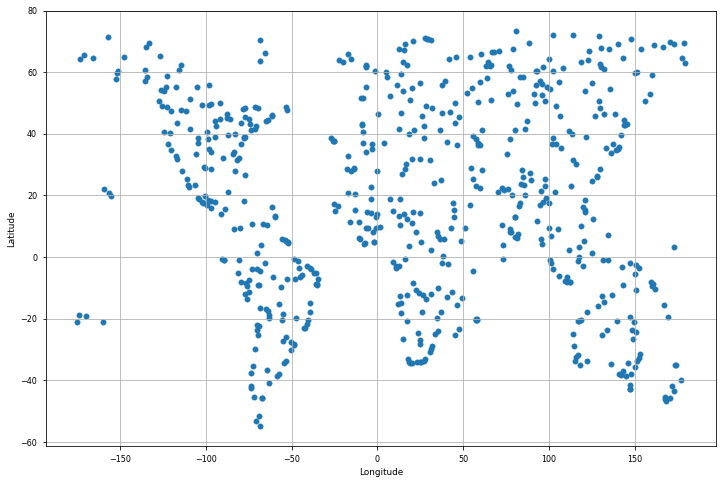

In [28]:
x = cities_df2["longitude"]
y = cities_df2["latitude"]
names = cities_df2["country"]

# plot the coordinates
fig, ax = plt.subplots()
sc = plt.scatter(x, y)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.savefig("Images/city_positions_{}.png".format(today))
plt.grid()

## Resources
Country codes per continent were obtained [here](https://gist.github.com/orenitamar/3207618).